In [2]:
from scipy.stats import norm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import matplotlib.pyplot as plt


# 1. A. Normal Distribution

The normal distribution is given by $$G(x)=\frac{e^{-\frac{(x-\mu)^{2}}{2 \sigma^{2}}}}{\sqrt{2 \pi} \sigma}$$ with mean $$\mu$$ and standard deviation $$\sigma$$. It is the most normal distribution:)

# 1.B Try integrating the normal distribution

The following code generates a plot of the cumulative distribution function of the normal distribution. The function form is given by $$CDF(x)=\frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{x} e^{-t^{2} / 2} d t$$
In the plot of the cdf, for any given x, the corresponding y value keeps track of the total probability that a random variable is less than x, hence the integration starts from the negative infinity. 

Text(0.5, 1.0, 'Figure1')

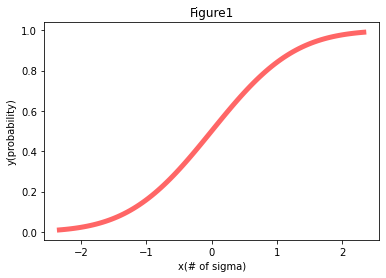

In [33]:
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x, stats.norm.cdf(x,loc = 0, scale = 1), 'r-', lw=5, alpha=0.6, label='norm cdf')
plt.xlabel('x(# of sigma)')
plt.ylabel('y(probability)')
plt.title('Figure1')

Try a couple different probabilities: 

In [25]:
stats.norm.cdf(0.69,loc = 0, scale = 1)

0.7549029063256906

In [23]:
stats.norm.cdf(-1,loc = 0, scale = 1)

0.15865525393145707

All values match the z table on wikipedia.

# 1.C. Integrate the inverse of a normal distribution

Given a probability, find the # of sigmas from the center:

In [30]:
stats.norm.ppf(0.7549029063256906, loc=0, scale=1)

0.6900000000000001

In [31]:
stats.norm.ppf(0.15865525393145707, loc=0, scale=1)

-1.0

All values match with the # of sigmas we compared to the z table above.
The code below plots the inverse of the CDF of the normal distribution.

Text(0.5, 1.0, 'Figure2')

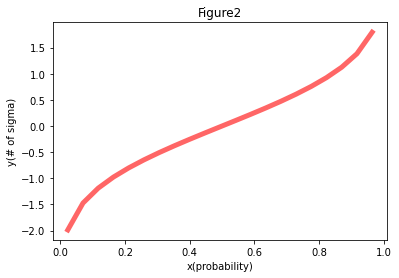

In [34]:
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x, stats.norm.ppf(x,loc = 0, scale = 1), 'r-', lw=5, alpha=0.6, label='norm cdf')
plt.xlabel('x(probability)')
plt.ylabel('y(# of sigma)')
plt.title('Figure2')

# 1. D. Negative Sigma
The negative or positive values on the y axis correspond to different directions from x=0, the same as the x axis of Figure 1. 

# 2. A. Rayleigh distribution 

The Rayleigh distribution describes the distribution of non-negative random variables, like the wind velocity or length of random 2D vectors. The probability density is given by $$P(r)=\frac{r e^\frac{-r^{2}}{2 s^{2}}}{s^{2}}$$ for $$r\geq 0$$, where s is the scale parameter. The larger the scale parameter, the more spread out the distribution appears. 

# B. Make plots

The following code generates an overlay of the discrete and continuous Rayleigh distribution with scale parameter 1. The peak of the plot is located at x=1.

Text(0.5, 1.0, 'Figure3')

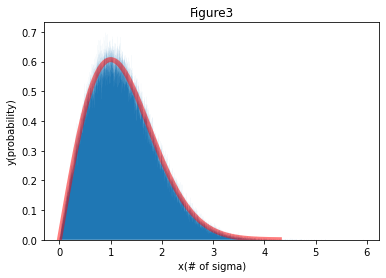

In [81]:
from scipy.stats import rayleigh
fig, ax = plt.subplots(1, 1)
x = np.linspace(rayleigh.ppf(0), rayleigh.ppf(0.9999), 1000000)
r = rayleigh.rvs(size=1000000)
ax.hist(r, 10000, density=True, histtype='stepfilled', alpha=1)
ax.plot(x, rayleigh.pdf(x, 0, 1), 'r-', lw=5, alpha=0.5, label='rayleigh pdf')
plt.xlabel('x(# of sigma)')
plt.ylabel('y(probability)')
plt.title('Figure3')

while the Rayleigh distribution with scale parameter 2 looks more spread out and the peak position also shifts to 2: 

Text(0.5, 1.0, 'Figure4')

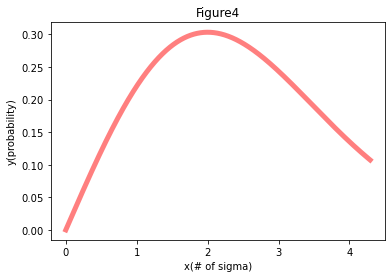

In [82]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, rayleigh.pdf(x, 0, 2), 'r-', lw=5, alpha=0.5, label='rayleigh pdf')
plt.xlabel('x(# of sigma)')
plt.ylabel('y(probability)')
plt.title('Figure4')

# 3. A. Select a value: 0.72

# 3. B. State the statistical question

Throwing darts onto a complex plane, what's the probablity that the dart hits a complex number whose normalized absolute value is less than 0.72? 

# 3.C. Convert your word question into a mathematical integral

Since the absolute values of random complex numbers follow the Rayleigh distribution, the probablity that the dart hits a complex number with a normalized absolute value less than 0.72 can be found by integrating the probability density function of the Rayleigh distribution(s=1): $$P(dart<0.72)=\int_{0}^{0.72}r e^\frac{-r^{2}}{2} dr$$. The lower bound of the integral starts at zero because the Rayleigh distribution is defined for non-negative values. 

# 3. D. Calculate the probability that the background produced the signal

First convert 0.72 into # of sigmas: 

In [142]:
rayleigh.ppf(0.72)

1.5955974904799064

Then integrate from this number of sigma to positive infinity to find the probability that the background gives the signal(assuming the background is normally distributed): 

In [144]:
1-norm.cdf(1.5955974904799064, loc=0, scale=1)

0.05528934409192965

The default cdf integrates from negative infinity to x, here its complement(integrate from x to positive infinity) is found by 1-cdf(x). 

# 3. E. Convert your probability into an equivalent 'sigma'

With a probability in mind, we can plug it into the inverse of the cumulative distribution function to find the number of sigmas it corresponds to. 

In [145]:
rayleigh.ppf(0.72, loc=0, scale=1)

1.5955974904799064

# 4. Try various hypothetical measurement values and see how the probabilities and 'sigmas' change

In [147]:
rayleigh.ppf(1, loc=0, scale=1)

inf

In [150]:
rayleigh.ppf(0, loc=0, scale=1)

0.0

The end points of the distribution checks out!

# Non-continuous Distribution: Poisson 

# 1. A. Intro

The Poisson distribution is useful for photon statistics. 
The function form of the distribution is given by $$P(n)=\frac{e^{-\mu} \mu^{n}}{n !}$$ for non-negative integer n. The mean of the distribution is $$\mu$$. The larger the mean, the more spread-out the distribution appears. 

# B. Make plots

The following code generates Poisson distribution with different means. 

mean=20

Text(0.5, 1.0, 'Figure5')

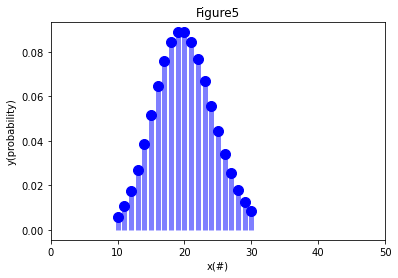

In [116]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
mu = 20
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=10, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.xlim([0,50])
plt.xlabel('x(#)')
plt.ylabel('y(probability)')
plt.title('Figure5')

mean=10

Text(0.5, 1.0, 'Figure6')

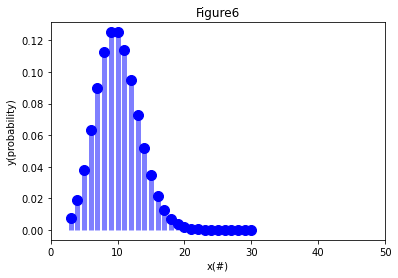

In [115]:
fig, ax = plt.subplots(1, 1)
x = np.arange(poisson.ppf(0.01, 10), poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, 10), 'bo', ms=10, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, 10), colors='b', lw=5, alpha=0.5)
plt.xlim([0,50])
plt.xlabel('x(#)')
plt.ylabel('y(probability)')
plt.title('Figure6')

Observation: the greater the mean, the more spread-out the distribution appears.

# C. A hypothetical Q&A

Q: What's the probability that 100 photons are detected when a pulse of laser consisting an average number of 500 photons arrive at a single photon counting module(assuming the detection efficiency is perfect)?  

A: The photons in laser beams can be regarded as in a coherent state, and the projection of a coherent state onto Fock states is Poissonian. So the question can be rephrased as 

$$P(total n=100)=\int_{0}^{100}\frac{e^{-\mu} \mu^{n}}{n !}dn\approx 0$$ 

In [130]:
poisson.cdf(100, 500)

7.523088463050328e-106

this is close enough to zero

# D. Discrete distributions --> discrete probabilities and 'sigmas'. 
Think about this and discuss the implications for experiments.

Discrete probabilities: The measurable probabilities of non-continuous distributions should match the number of all possible trials. Since the sampling is discrete, the all possible probabilities are also discrete. 

Discrete "sigmas": Plugging a probability into the inverse function of the CDF of the discrete distribution gives the variable value that yields the probability. Therefore the range of inverse CDF is discrete. When translated into the number of sigmas, the number would also be discrete and share the same properties as the set of all possible trials. For instance, only integer number of photons can be measured, so the inverse of the CDF of the Poisson distribution always gives an integer

In [137]:
poisson.ppf(0.567890, 500.1)

504.0

# E. Discrete result, continuous parameters
For example, the mean of a Poisson distribution can be 9.2. Think about and explain why this makes sense and what changes continuously and what doesn't.

The mean of any distribution over an interval is defined as $$\bar{f}=\frac{1}{b-a} \int_{a}^{b} f(x) d x$$, and for a discrete distribution $$\bar{f}=\frac{1}{b-a} \sum_{a}^{b} f(x) $$. The mean needs not be integer multiples of the sampling interval. 

The sampling size may change continuously, but the mean and variance stay the same for Poisson distribution